* GDP per capita
* Healthy Life Expectancy
* Social support
* Freedom to make life choices
* Generosity
* Corruption Perception

Pour calculer cet indice du bien-être, les chercheurs se sont basés sur six critères : le PIB du pays en bleu clair, le lien social en orange (tiré d’un sondage international questionnant les individus sur leur sentiment de pouvoir compter sur quelqu’un ou non), l’espérance de vie saine en rouge (soit le ratio entre l'espérance de vie totale et le temps moyen passé en bonne santé), la liberté en bleu foncé (également basé sur un sondage), la générosité en vert (par rapport aux dons aux œuvres de charité), et le sentiment de corruption en violet (qui fait inversement grimper le bonheur).

A ces six critères s’ajoute un élément de comparaison nommé Dystopia (en gris). Il faut imaginer cet indice comme un pays imaginaire qui réunirait les moyennes les plus basses obtenues pour chaque critère (par exemple le PIB de la Sierra Leone avec l’espérance de vie saine du Nigeria et le sentiment de liberté de la Grèce, etc). La moyenne de chaque pays est ensuite comparée à celle de Dystopia (donc aux pires scores qui soient) pour voir où elle se situe. Plus la moyenne du pays augmente par rapport à celle de Dystopia (comme signifié par la partie grise), plus sa population est réellement heureuse.

In [1]:
import pandas as pd
import numpy as np

In [2]:
url='C:/Users/auror/Project3_WorldHappiness/data/2020.CSV'

In [3]:
df = pd.read_csv(url)

In [4]:
df

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


In [6]:
df.shape

(153, 20)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

In [9]:
df.isnull().sum()
#no missing value

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [11]:
df_corr = df.corr()

In [12]:
df_corr.applymap(lambda x: 'highly correlated' if (x>0.7) & (x!=1) else 'NA')

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Ladder score,NA,NA,highly correlated,highly correlated,highly correlated,highly correlated,highly correlated,NA,NA,NA,NA,highly correlated,highly correlated,highly correlated,NA,NA,NA,NA
Standard error of ladder score,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
upperwhisker,highly correlated,NA,NA,highly correlated,highly correlated,highly correlated,highly correlated,NA,NA,NA,NA,highly correlated,highly correlated,highly correlated,NA,NA,NA,NA
lowerwhisker,highly correlated,NA,highly correlated,NA,highly correlated,highly correlated,highly correlated,NA,NA,NA,NA,highly correlated,highly correlated,highly correlated,NA,NA,NA,NA
Logged GDP per capita,highly correlated,NA,highly correlated,highly correlated,NA,highly correlated,highly correlated,NA,NA,NA,NA,highly correlated,highly correlated,highly correlated,NA,NA,NA,NA
Social support,highly correlated,NA,highly correlated,highly correlated,highly correlated,NA,highly correlated,NA,NA,NA,NA,highly correlated,highly correlated,highly correlated,NA,NA,NA,NA
Healthy life expectancy,highly correlated,NA,highly correlated,highly correlated,highly correlated,highly correlated,NA,NA,NA,NA,NA,highly correlated,highly correlated,highly correlated,NA,NA,NA,NA
Freedom to make life choices,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,highly correlated,NA,NA,NA
Generosity,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,highly correlated,NA,NA
Perceptions of corruption,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


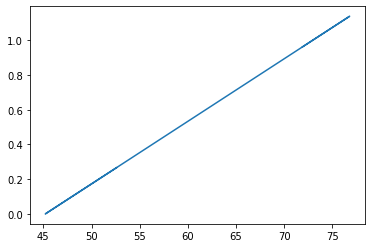

In [16]:
import matplotlib.pyplot as plt
plt.plot(df['Healthy life expectancy'],df['Explained by: Healthy life expectancy'])

In [5]:
from bs4 import BeautifulSoup
import requests as r
import pandas as pd
import numpy as np

In [6]:
url = 'https://en.wikipedia.org/wiki/List_of_cities_by_sunshine_duration'
html=r.get(url).content
soup=BeautifulSoup(html)

continent = ['africa', 'asia', 'europe','american','americas','oceania']
col=['Country', 'City', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Year', 'Ref.']
df_sunny=pd.DataFrame(columns=col)

for i in range(len(continent)):
    table=soup.select('table.sortable')[i]
    rows = table.find_all('tr')
    table =[[cell.strip() for cell in i.text.strip().split('\n') if cell!=''] for i in rows]
    df_sunny = pd.concat([df_sunny, pd.DataFrame(table[1:], columns=col)], ignore_index=True)
    
df_sunny['Year']=df_sunny['Year'].str.replace(',','')
df_sunny = df_sunny.astype({'Year': np.float64})
df_sunny = df_sunny.pivot_table(index=['Country'], values='Year', aggfunc='mean')
df_sunny


In [32]:
table_africa=soup.select('table.sortable')[0]
rows = table_africa.find_all('tr')
table_africa =[[cell.strip() for cell in i.text.strip().split('\n') if cell!=''] for i in rows]
df_sun_africa = pd.DataFrame(table_africa[1:], columns=table_africa[0])
table_africa[0]

['Country',
 'City',
 'Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec',
 'Year',
 'Ref.']

In [15]:
df_sun_africa['Year']=df_sun_africa['Year'].str.replace(',','')
df_sun_africa = df_sun_africa.astype({'Year': np.float64})

In [21]:
df_sun_africa = df_sun_africa.pivot_table(index=['Country'], values='Year', aggfunc='mean')
df_sun_africa

,Year
Country,
Algeria,3266.500000
Angola,2341.000000
Benin,2630.466667
Botswana,3426.666667
Burkina Faso,3209.000000
Burundi,2373.400000
Cameroon,2165.125000
Central African Republic,2546.500000
Chad,3353.200000


table_asia=soup.select('table.sortable')[1]
rows = table_asia.find_all('tr')
table_asia =[[cell.strip() for cell in i.text.strip().split('\n') if cell!=''] for i in rows]
df_sun_asia = pd.DataFrame(table_asia[1:], columns=table_asia[0])
df_sun_asia['Year']=df_sun_asia['Year'].str.replace(',','')
df_sun_asia = df_sun_asia.astype({'Year': np.float64})
df_sun_asia=df_sun_asia.pivot_table(index=['Country'], values='Year', aggfunc='mean')

In [51]:
continent = ['africa', 'asia', 'europe','american','americas','oceania']
col=['Country', 'City', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Year', 'Ref.']
df_sunny=pd.DataFrame(columns=col)

for i in range(len(continent)):
    table=soup.select('table.sortable')[i]
    rows = table.find_all('tr')
    table =[[cell.strip() for cell in i.text.strip().split('\n') if cell!=''] for i in rows]
    df_sunny = pd.concat([df_sunny, pd.DataFrame(table[1:], columns=col)], ignore_index=True)
    
df_sunny['Year']=df_sunny['Year'].str.replace(',','')
df_sunny = df_sunny.astype({'Year': np.float64})
df_sunny = df_sunny.pivot_table(index=['Country'], values='Year', aggfunc='mean')
df_sunny

,Year
Country,
Afghanistan,3175.100000
Albania,2544.000000
Algeria,3266.500000
Angola,2341.000000
Argentina,2220.300000
...,...
Uzbekistan,2823.900000
Venezuela,2895.450000
Vietnam,2123.500000
